In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

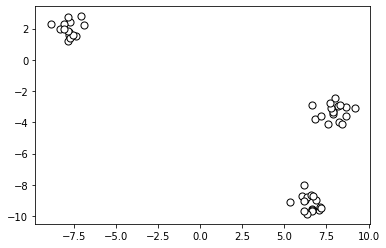

In [32]:
N_SAMPLES = 50
N_CENTERS = 3
N_FEATURES = 2

X, _ = make_blobs(
n_samples=N_SAMPLES, n_features=N_FEATURES,
    centers=N_CENTERS, cluster_std=0.5,
    shuffle=True, random_state=6
)

plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [33]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    max_iter=300, random_state=5
)

y_km = km.fit_predict(X)

In [34]:
import pandas as pd
p = pd.DataFrame({"Point x": [x[0] for x in X], "Point y": [x[1] for x in X], "Cluster": y_km})
p.Cluster.value_counts()

2    17
1    17
0    16
Name: Cluster, dtype: int64

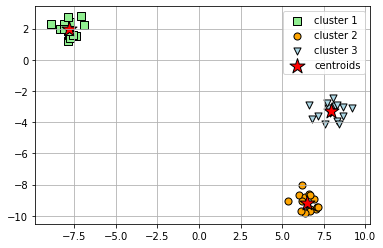

In [35]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

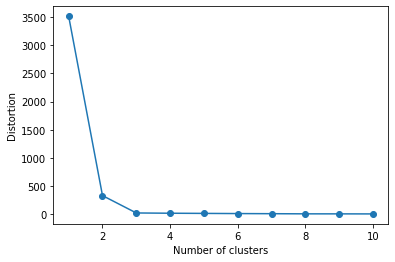

In [36]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering

hier_clust = AgglomerativeClustering(linkage='ward')
y_agglomerate = hier_clust.fit(X)

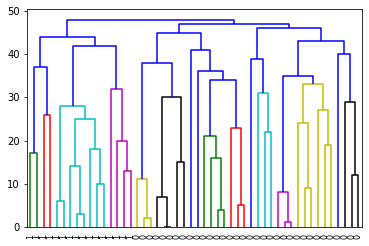

In [38]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(y_agglomerate, labels=y_agglomerate.labels_)